###  This notebook will be mainly used for the capstone project

# 1. Pre-Processing the Data

In [1]:
!pip install -U scikit-learn
!conda install -c anaconda seaborn -y
!conda install -c conda-forge folium=0.5.0 --yes
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import datetime
import seaborn as sns
import folium.plugins
import json

from matplotlib.lines import Line2D
from sklearn.cluster import KMeans 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss


Requirement already up-to-date: scikit-learn in c:\users\ericr\anaconda3\lib\site-packages (0.23.2)
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ericr\anaconda3

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.5-py38h32f6830~ --> anaconda::conda-4.8.5-py38_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anacon

In [2]:
DC='Data-Collisions.csv'
df=pd.read_csv(DC)
df.shape

C:\Users\ericr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(194673, 38)

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.corr()['SEVERITYCODE'].sort_values()

VEHCOUNT         -0.054686
SDOTCOLNUM        0.004226
INTKEY            0.006553
X                 0.010309
Y                 0.017737
OBJECTID          0.020131
INCKEY            0.022065
COLDETKEY         0.022079
SEGLANEKEY        0.104276
PERSONCOUNT       0.130949
CROSSWALKKEY      0.175093
SDOT_COLCODE      0.188905
PEDCYLCOUNT       0.214218
PEDCOUNT          0.246338
SEVERITYCODE      1.000000
SEVERITYCODE.1    1.000000
Name: SEVERITYCODE, dtype: float64

In [5]:
df.drop(['SEVERITYCODE','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT','INCDATE','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','HITPARKEDCAR'], inplace=True, axis=1)
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE.1,PEDCOUNT,PEDCYLCOUNT,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,-122.323148,47.703140,Intersection,2,0,0,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,0,0
1,-122.347294,47.647172,Block,1,0,0,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,0,0
2,-122.334540,47.607871,Block,1,0,0,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,0,0
3,-122.334803,47.604803,Block,1,0,0,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,0,0
4,-122.306426,47.545739,Intersection,2,0,0,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,0,0


In [6]:
df.rename(columns={'SEGLANEKEY':'Seglane_key','CROSSWALKKEY':'Crosswalk_key','PEDCYLCOUNT':'Ped_cycl_count','PEDCOUNT':'Ped_count','ADDRTYPE':'Adress_type','SEVERITYCODE.1':'Severity_code','INCDTTM':'Date_time','WEATHER':'Weather','ROADCOND':'Road_cond','LIGHTCOND':'Light_cond'},inplace=True)
df.head()

,X,Y,Adress_type,Severity_code,Ped_count,Ped_cycl_count,Date_time,Weather,Road_cond,Light_cond,Seglane_key,Crosswalk_key
0,-122.323148,47.703140,Intersection,2,0,0,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,0,0
1,-122.347294,47.647172,Block,1,0,0,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,0,0
2,-122.334540,47.607871,Block,1,0,0,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,0,0
3,-122.334803,47.604803,Block,1,0,0,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,0,0
4,-122.306426,47.545739,Intersection,2,0,0,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,0,0


In [7]:
df.isna().sum()

X                 5334
Y                 5334
Adress_type       1926
Severity_code        0
Ped_count            0
Ped_cycl_count       0
Date_time            0
Weather           5081
Road_cond         5012
Light_cond        5170
Seglane_key          0
Crosswalk_key        0
dtype: int64

In [8]:
df.describe()

,X,Y,Severity_code,Ped_count,Ped_cycl_count,Seglane_key,Crosswalk_key
count,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.946730e+05
mean,-122.330518,47.619543,1.298901,0.037139,0.028391,269.401114,9.782452e+03
std,0.029976,0.056157,0.457778,0.198150,0.167413,3315.776055,7.226926e+04
min,-122.419091,47.495573,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,-122.348673,47.575956,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,-122.330224,47.615369,1.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,-122.311937,47.663664,2.000000,0.000000,0.000000,0.000000,0.000000e+00
max,-122.238949,47.734142,2.000000,6.000000,2.000000,525241.000000,5.239700e+06


In [9]:
df.dropna(subset = ["X","Weather","Road_cond","Light_cond"], inplace=True)
df = df[df.Weather != 'Unknown']
df = df[df.Weather != 'Other']
df = df[df.Road_cond != 'Other']
df = df[df.Road_cond != 'Unknown']
df = df[df.Light_cond != 'Unknown']
df = df[df.Light_cond != 'Other']
df = df[df.Light_cond != 'Dark - Unknown Lighting']
df.isna().sum()

X                 0
Y                 0
Adress_type       0
Severity_code     0
Ped_count         0
Ped_cycl_count    0
Date_time         0
Weather           0
Road_cond         0
Light_cond        0
Seglane_key       0
Crosswalk_key     0
dtype: int64

In [10]:
df.shape

(166209, 12)

In [11]:
df.describe()

,X,Y,Severity_code,Ped_count,Ped_cycl_count,Seglane_key,Crosswalk_key
count,166209.000000,166209.000000,166209.000000,166209.000000,166209.000000,166209.000000,1.662090e+05
mean,-122.330338,47.618942,1.329170,0.041364,0.031876,300.264083,1.076991e+04
std,0.029813,0.056671,0.469913,0.209007,0.177102,3530.931142,7.580180e+04
min,-122.419032,47.495573,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,-122.348172,47.574310,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,-122.330276,47.614827,1.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,-122.311937,47.663664,2.000000,0.000000,0.000000,0.000000,0.000000e+00
max,-122.238949,47.734142,2.000000,6.000000,2.000000,525241.000000,5.239700e+06


In [12]:
df['Date_time'] = pd.to_datetime(df['Date_time'])
df['Month'] = pd.DatetimeIndex(df['Date_time']).month
df['Week'] = pd.DatetimeIndex(df['Date_time']).week
df['Week_day'] = pd.DatetimeIndex(df['Date_time']).weekday
df['Hour'] = pd.DatetimeIndex(df['Date_time']).hour
df.head()

,X,Y,Adress_type,Severity_code,Ped_count,Ped_cycl_count,Date_time,Weather,Road_cond,Light_cond,Seglane_key,Crosswalk_key,Month,Week,Week_day,Hour
0,-122.323148,47.703140,Intersection,2,0,0,2013-03-27 14:54:00,Overcast,Wet,Daylight,0,0,3,13,2,14
1,-122.347294,47.647172,Block,1,0,0,2006-12-20 18:55:00,Raining,Wet,Dark - Street Lights On,0,0,12,51,2,18
2,-122.334540,47.607871,Block,1,0,0,2004-11-18 10:20:00,Overcast,Dry,Daylight,0,0,11,47,3,10
3,-122.334803,47.604803,Block,1,0,0,2013-03-29 09:26:00,Clear,Dry,Daylight,0,0,3,13,4,9
4,-122.306426,47.545739,Intersection,2,0,0,2004-01-28 08:04:00,Raining,Wet,Daylight,0,0,1,5,2,8


In [13]:
df = df[["Y", "X", "Adress_type", "Severity_code", "Ped_count", "Ped_cycl_count", "Seglane_key", "Crosswalk_key", "Date_time", "Month", "Week", "Week_day", "Hour", "Weather", "Road_cond", "Light_cond"]]
df.head()

,Y,X,Adress_type,Severity_code,Ped_count,Ped_cycl_count,Seglane_key,Crosswalk_key,Date_time,Month,Week,Week_day,Hour,Weather,Road_cond,Light_cond
0,47.703140,-122.323148,Intersection,2,0,0,0,0,2013-03-27 14:54:00,3,13,2,14,Overcast,Wet,Daylight
1,47.647172,-122.347294,Block,1,0,0,0,0,2006-12-20 18:55:00,12,51,2,18,Raining,Wet,Dark - Street Lights On
2,47.607871,-122.334540,Block,1,0,0,0,0,2004-11-18 10:20:00,11,47,3,10,Overcast,Dry,Daylight
3,47.604803,-122.334803,Block,1,0,0,0,0,2013-03-29 09:26:00,3,13,4,9,Clear,Dry,Daylight
4,47.545739,-122.306426,Intersection,2,0,0,0,0,2004-01-28 08:04:00,1,5,2,8,Raining,Wet,Daylight


In [14]:
df['Adress_type'].replace(to_replace=['Alley','Block','Intersection'], value=[1,2,3],inplace=True)
df['Weather'].replace(to_replace=['Clear','Partly Cloudy','Fog/Smog/Smoke','Overcast','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Blowing Sand/Dirt'], value=[1,2,3,4,5,6,7,8,9],inplace=True)
df['Road_cond'].replace(to_replace=['Dry','Sand/Mud/Dirt','Wet','Standing Water','Snow/Slush','Ice','Oil'], value=[1,2,3,4,5,6,7],inplace=True)
df['Light_cond'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dawn','Daylight','Dusk'], value=[1,1,2,3,4,5],inplace=True)
df.head()

,Y,X,Adress_type,Severity_code,Ped_count,Ped_cycl_count,Seglane_key,Crosswalk_key,Date_time,Month,Week,Week_day,Hour,Weather,Road_cond,Light_cond
0,47.703140,-122.323148,3,2,0,0,0,0,2013-03-27 14:54:00,3,13,2,14,4,3,4
1,47.647172,-122.347294,2,1,0,0,0,0,2006-12-20 18:55:00,12,51,2,18,5,3,2
2,47.607871,-122.334540,2,1,0,0,0,0,2004-11-18 10:20:00,11,47,3,10,4,1,4
3,47.604803,-122.334803,2,1,0,0,0,0,2013-03-29 09:26:00,3,13,4,9,1,1,4
4,47.545739,-122.306426,3,2,0,0,0,0,2004-01-28 08:04:00,1,5,2,8,5,3,4


In [15]:
df.dtypes

Y                        float64
X                        float64
Adress_type                int64
Severity_code              int64
Ped_count                  int64
Ped_cycl_count             int64
Seglane_key                int64
Crosswalk_key              int64
Date_time         datetime64[ns]
Month                      int64
Week                       int64
Week_day                   int64
Hour                       int64
Weather                    int64
Road_cond                  int64
Light_cond                 int64
dtype: object

In [16]:
df.corr()['Severity_code'].sort_values()

Week_day         -0.016959
Road_cond        -0.002314
Weather           0.001463
X                 0.006965
Month             0.007835
Week              0.008394
Y                 0.026758
Hour              0.027353
Light_cond        0.034714
Seglane_key       0.102569
Crosswalk_key     0.170861
Adress_type       0.176374
Ped_cycl_count    0.212406
Ped_count         0.241113
Severity_code     1.000000
Name: Severity_code, dtype: float64

In [17]:
#df['Severity_code'].value_counts().to_frame()
df['Severity_code'].value_counts()

1    111498
2     54711
Name: Severity_code, dtype: int64

In [18]:
df['Ped_count'].value_counts()

0    159619
1      6342
2       220
3        22
4         4
6         1
5         1
Name: Ped_count, dtype: int64

In [19]:
df['Ped_cycl_count'].value_counts()

0    160953
1      5214
2        42
Name: Ped_cycl_count, dtype: int64

In [20]:
df['Seglane_key'].value_counts()

0        163574
6532         19
6078         16
12162        14
10336        14
          ...  
20038         1
9803          1
14281         1
4178          1
32942         1
Name: Seglane_key, Length: 1880, dtype: int64

In [21]:
print("1 - Alley")
print("2 - Block")
print("3 - Intersection")
print("-------------------------------")
df.groupby(['Severity_code'])['Adress_type'].value_counts(normalize=True)

1 - Alley
2 - Block
3 - Intersection
-------------------------------


Severity_code  Adress_type
1              2              0.692739
               3              0.307261
2              2              0.511853
               3              0.488147
Name: Adress_type, dtype: float64

In [22]:
print("1 - Dark - No Street Lights / Street Lights Off")
print("2 - Dark - Street Lights On")
print("3 - Dawn")
print("4 - Daylight")
print("5 - Dusk")
print("-------------------------------")
df.groupby(['Severity_code'])['Light_cond'].value_counts(normalize=True)

1 - Dark - No Street Lights / Street Lights Off
2 - Dark - Street Lights On
3 - Dawn
4 - Daylight
5 - Dusk
-------------------------------


Severity_code  Light_cond
1              4             0.653509
               2             0.283700
               5             0.032817
               1             0.016117
               3             0.013857
2              4             0.684506
               2             0.255689
               5             0.034234
               3             0.014476
               1             0.011095
Name: Light_cond, dtype: float64

In [23]:
df.groupby(['Severity_code'])['Hour'].value_counts(normalize=True)

Severity_code  Hour
1              0       0.157079
               17      0.064817
               16      0.063257
               15      0.060315
               14      0.057301
               13      0.055526
               12      0.055068
               18      0.047561
               11      0.044745
               8       0.043642
               9       0.042153
               10      0.039086
               19      0.037185
               7       0.033400
               20      0.032736
               21      0.029570
               22      0.029238
               23      0.025050
               2       0.020682
               1       0.019722
               6       0.016162
               3       0.009686
               5       0.008888
               4       0.007130
2              0       0.142147
               17      0.078759
               16      0.070754
               15      0.066074
               14      0.059659
               18      0.057886
               13   

In [24]:
print("1 - Alley")
print("2 - Block")
print("3 - Intersection")
print("-------------------------------")
df['Adress_type'].value_counts()

1 - Alley
2 - Block
3 - Intersection
-------------------------------


2    105243
3     60966
Name: Adress_type, dtype: int64

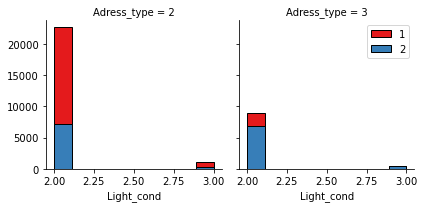

In [25]:
bins = np.linspace(df.Adress_type.min(), df.Adress_type.max(), 10)
g = sns.FacetGrid(df, col="Adress_type", hue="Severity_code", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Light_cond', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# 2. Data visualization

### Cases considering Adresst type only

### Cases considering Light Conditions (Light_cond) only

In [26]:
print("1 - Dark - No Street Lights / Street Lights Off")
print("2 - Dark - Street Lights On")
print("3 - Dawn")
print("4 - Daylight")
print("5 - Dusk")
print("-------------------------------")
df['Light_cond'].value_counts()

1 - Dark - No Street Lights / Street Lights Off
2 - Dark - Street Lights On
3 - Dawn
4 - Daylight
5 - Dusk
-------------------------------


4    110315
2     45621
5      5532
1      2404
3      2337
Name: Light_cond, dtype: int64

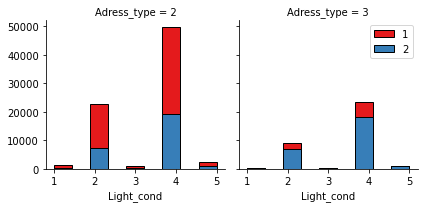

In [27]:
bins = np.linspace(df.Light_cond.min(), df.Light_cond.max(), 10)
g = sns.FacetGrid(df, col="Adress_type", hue="Severity_code", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Light_cond', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Cases considering Road Conditions (Road_cond) only

In [28]:
print("1 - Dry")
print("2 - Sand/Mud/Dirt")
print("3 - Wet")
print("4 - Standing Water")
print("5 - Snow/Slush")
print("6 - Ice")
print("7 - Oil")
print("-------------------------------")
df['Road_cond'].value_counts()

1 - Dry
2 - Sand/Mud/Dirt
3 - Wet
4 - Standing Water
5 - Snow/Slush
6 - Ice
7 - Oil
-------------------------------


1    119164
3     44970
6      1055
5       821
4        94
2        56
7        49
Name: Road_cond, dtype: int64

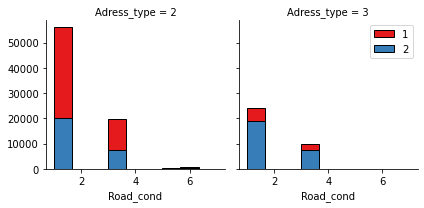

In [29]:
bins = np.linspace(df.Road_cond.min(), df.Road_cond.max(), 10)
g = sns.FacetGrid(df, col="Adress_type", hue="Severity_code", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Road_cond', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [30]:
# Most accidents when dry or wet

### Cases considering Weather Conditions (Weather) only

In [31]:
print("1 - Clear")
print("2 - Partly Cloudy")
print("3 - Fog/Smog/Smoke")
print("4 - Overcast")
print("5 - Raining")
print("6 - Severe Crosswind")
print("7 - Sleet/Hail/Freezing Rain")
print("8 - Snowing")
print("9 - Blowing Sand/Dirt")
print("-------------------------------")
df['Weather'].value_counts()

1 - Clear
2 - Partly Cloudy
3 - Fog/Smog/Smoke
4 - Overcast
5 - Raining
6 - Severe Crosswind
7 - Sleet/Hail/Freezing Rain
8 - Snowing
9 - Blowing Sand/Dirt
-------------------------------


1    106749
5     31555
4     26378
8       813
3       537
7       106
9        42
6        24
2         5
Name: Weather, dtype: int64

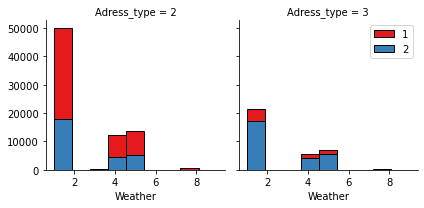

In [32]:
bins = np.linspace(df.Weather.min(), df.Weather.max(), 10)
g = sns.FacetGrid(df, col="Adress_type", hue="Severity_code", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Weather', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Cases considering Month (Month) only

In [33]:
df['Weather'].value_counts()

1    106749
5     31555
4     26378
8       813
3       537
7       106
9        42
6        24
2         5
Name: Weather, dtype: int64

(0.0, 13.0)

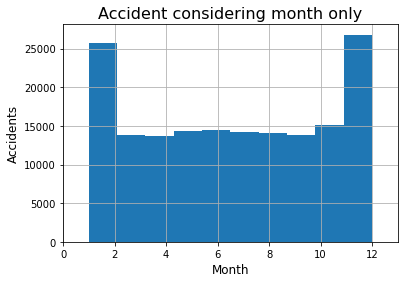

In [34]:
df.hist(column='Month', alpha=1, bins=10)
plt.title('Accident considering month only', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Accidents', fontsize=12)
plt.xlim([0,13.0])

### Cases considering Week (Week) only

In [35]:
df['Week'].value_counts()

44    3590
43    3482
40    3443
23    3422
42    3411
39    3362
20    3356
24    3355
2     3354
31    3335
29    3329
22    3325
41    3312
37    3295
46    3294
26    3293
30    3284
15    3281
45    3267
21    3267
25    3242
38    3239
50    3235
14    3235
28    3226
13    3221
19    3200
17    3199
11    3190
18    3184
34    3184
33    3166
10    3156
35    3143
32    3127
9     3126
47    3119
51    3114
5     3101
4     3085
27    3084
49    3083
16    3072
12    3066
48    3045
3     3040
1     3034
36    3027
6     2964
7     2843
8     2753
52    2268
53     381
Name: Week, dtype: int64

(0.0, 54.0)

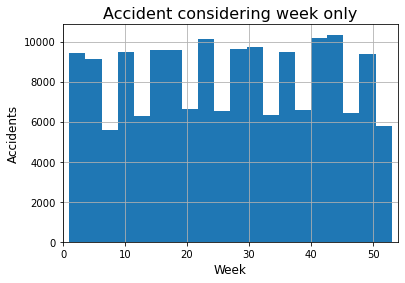

In [36]:
df.hist(column='Week', alpha=1, bins=20)
plt.title('Accident considering week only', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Accidents', fontsize=12)
plt.xlim([0,54.0])

In [37]:
#clustering der Unfälle in Bezug auf die Region (GPS)

### Cases considering Day (Week_day) only

In [38]:
print("0 - Sunday")
print("1 - Monday")
print("2 - Tuesday")
print("3 - Wednesday")
print("4 - Thursday")
print("5 - Friday")
print("6 - Saturday")
print("-------------------------------")
df['Week_day'].value_counts()

0 - Sunday
1 - Monday
2 - Tuesday
3 - Wednesday
4 - Thursday
5 - Friday
6 - Saturday
-------------------------------


4    27640
3    25127
2    24624
1    24392
5    23477
0    22341
6    18608
Name: Week_day, dtype: int64

(-0.5, 6.5)

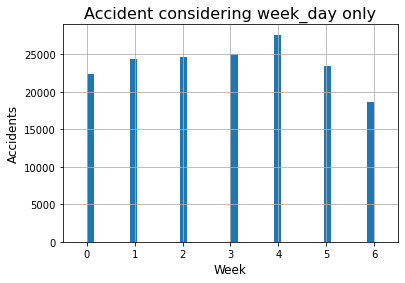

In [39]:
df.hist(column='Week_day', alpha=1, bins=40)
plt.title('Accident considering week_day only', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Accidents', fontsize=12)
plt.xlim([-0.5,6.5])

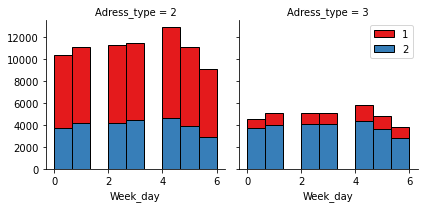

In [40]:
bins = np.linspace(df.Week_day.min(), df.Week_day.max(), 10)
g = sns.FacetGrid(df, col="Adress_type", hue="Severity_code", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Week_day', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Cases considering time/hour only

In [41]:
df['Hour'].value_counts()

0     25291
17    11536
16    10924
15    10340
14     9653
13     9168
12     9017
18     8470
8      7425
11     7286
9      7015
10     6430
19     6328
7      5779
20     5338
21     4855
22     4716
23     3849
2      3122
1      2991
6      2770
5      1452
3      1400
4      1054
Name: Hour, dtype: int64

(0.0, 24.0)

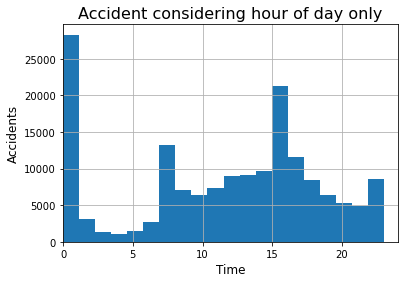

In [42]:
df.hist(column='Hour', alpha=1, bins=20)
plt.title('Accident considering hour of day only', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Accidents', fontsize=12)
plt.xlim([0,24])

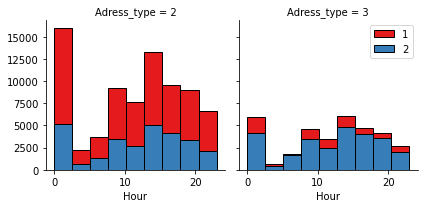

In [43]:
bins = np.linspace(df.Hour.min(), df.Hour.max(), 10)
g = sns.FacetGrid(df, col="Adress_type", hue="Severity_code", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Hour', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [44]:
sf_map = folium.Map(location=[47.60, -122.33], zoom_start=11)
sf_map

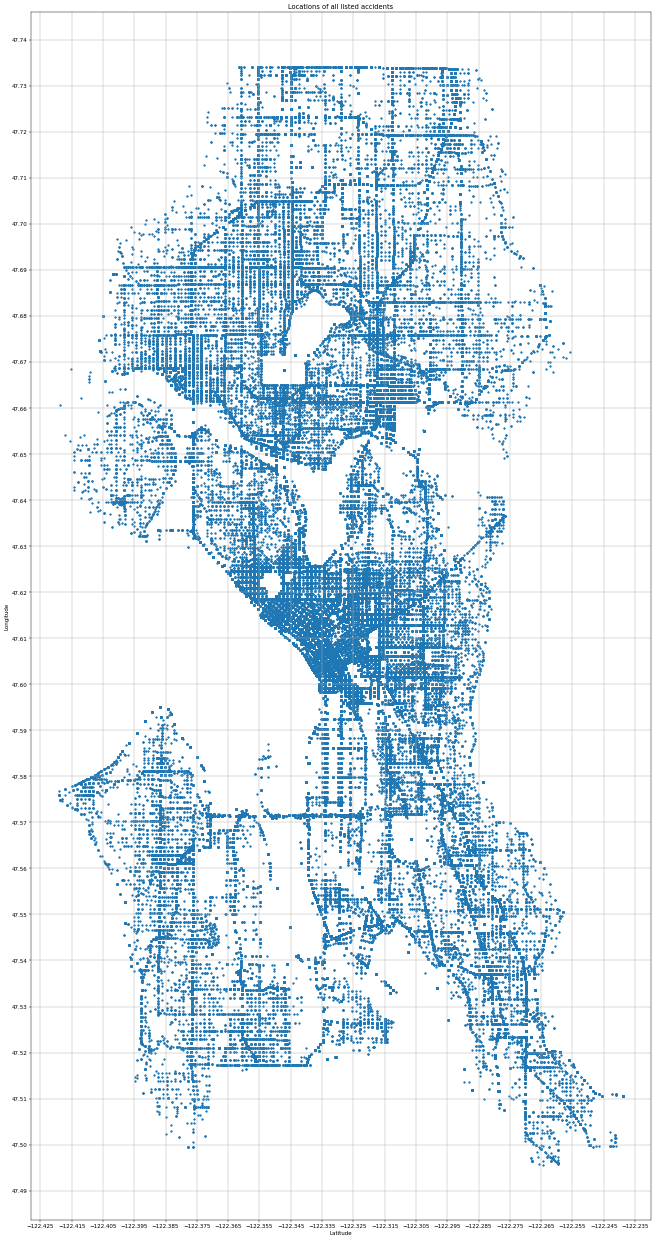

In [45]:
XV = df[['X']]
YV = df['Y']
fig = plt.figure(figsize=(20,40), dpi=40)

ax = fig.gca()
ax.set_title('Locations of all listed accidents')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xticks(np.arange(-122.435, -122.225, 0.01))
ax.set_yticks(np.arange(47.45, 47.75, 0.01))
plt.grid()
plt.scatter(XV, YV, marker='.')
plt.show()

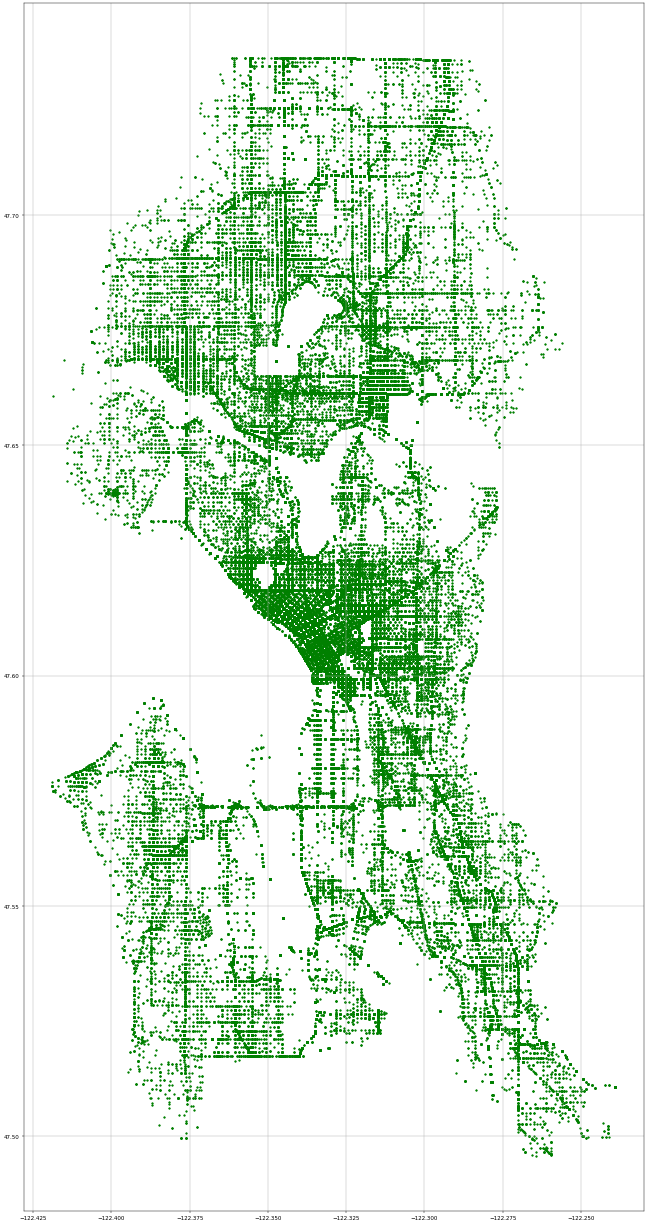

In [46]:
df_SC=df
df_SC = df_SC[df_SC.Severity_code != 2]
XV = df_SC[['X']]
YV = df_SC['Y']
fig2 = plt.figure(figsize=(20,40), dpi=40)

#plt.axis([-122.435, -122.225, 47.45, 47.75])
ax = fig.gca()
ax.set_title('Locations of all accidents with prop damage')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xticks(np.arange(-122.435, -122.225, 0.01))
ax.set_yticks(np.arange(47.45, 47.75, 0.01))
plt.grid()
plt.scatter(XV, YV, marker='.', color='green')
plt.show()

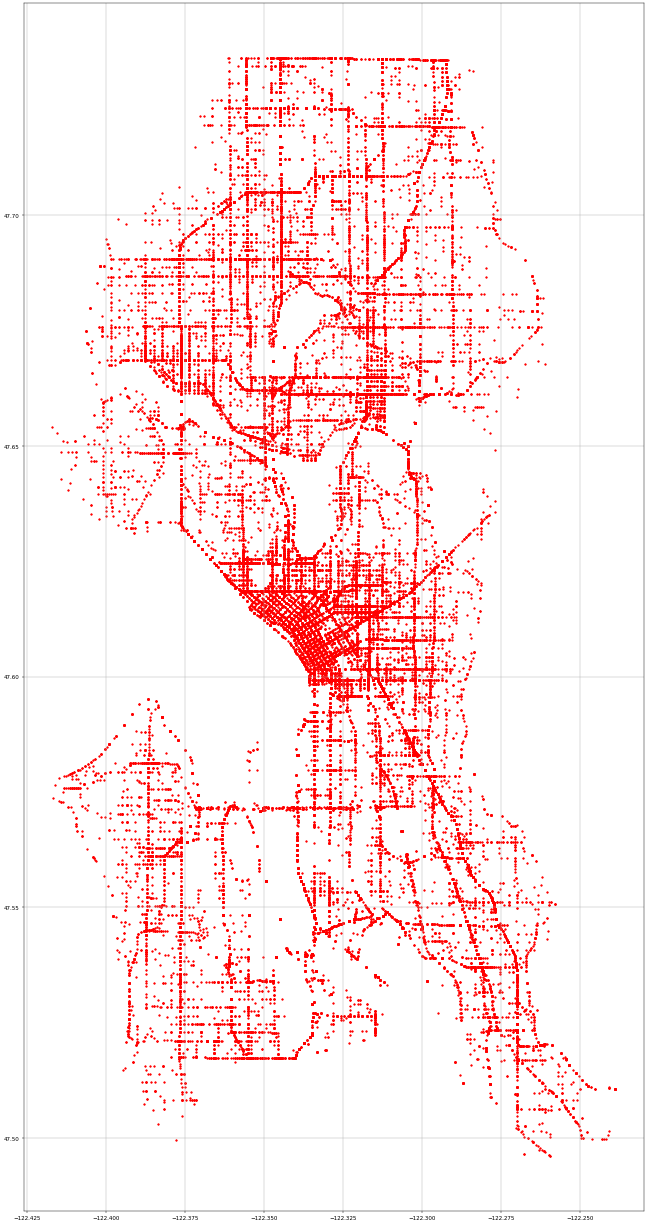

In [47]:
df_SC=df
df_SC = df_SC[df_SC.Severity_code != 1]
XV = df_SC[['X']]
YV = df_SC['Y']
fig2 = plt.figure(figsize=(20,40), dpi=40)

#plt.axis([-122.435, -122.225, 47.45, 47.75])
ax = fig.gca()
ax.set_title('Locations of all accidents with injuries')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xticks(np.arange(-122.435, -122.225, 0.01))
ax.set_yticks(np.arange(47.45, 47.75, 0.01))
plt.grid()
plt.scatter(XV, YV, marker='.', color='red')
plt.show()

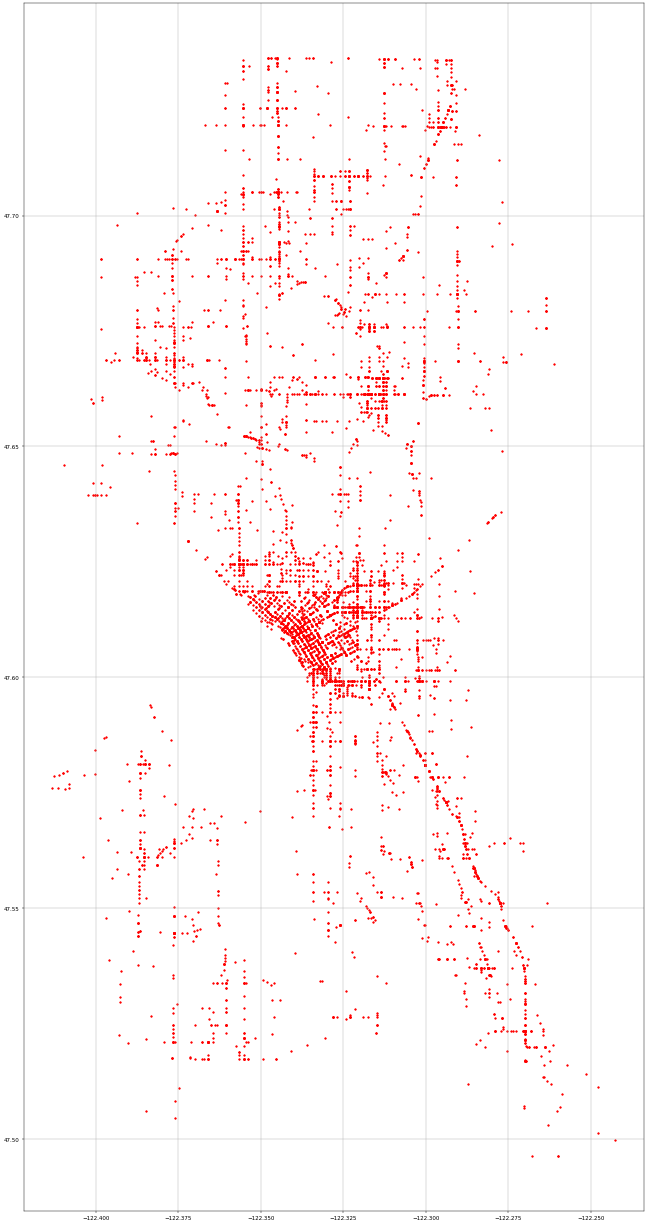

In [48]:
df_SC=df
df_SC = df_SC[df_SC.Ped_count >= 1]
XV = df_SC[['X']]
YV = df_SC['Y']
fig2 = plt.figure(figsize=(20,40), dpi=40)

#plt.axis([-122.435, -122.225, 47.45, 47.75])
ax = fig.gca()
ax.set_title('Locations of all accidents with pedestrians')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xticks(np.arange(-122.435, -122.225, 0.01))
ax.set_yticks(np.arange(47.45, 47.75, 0.01))
plt.grid()
plt.scatter(XV, YV, marker='.', color='red')
plt.show()

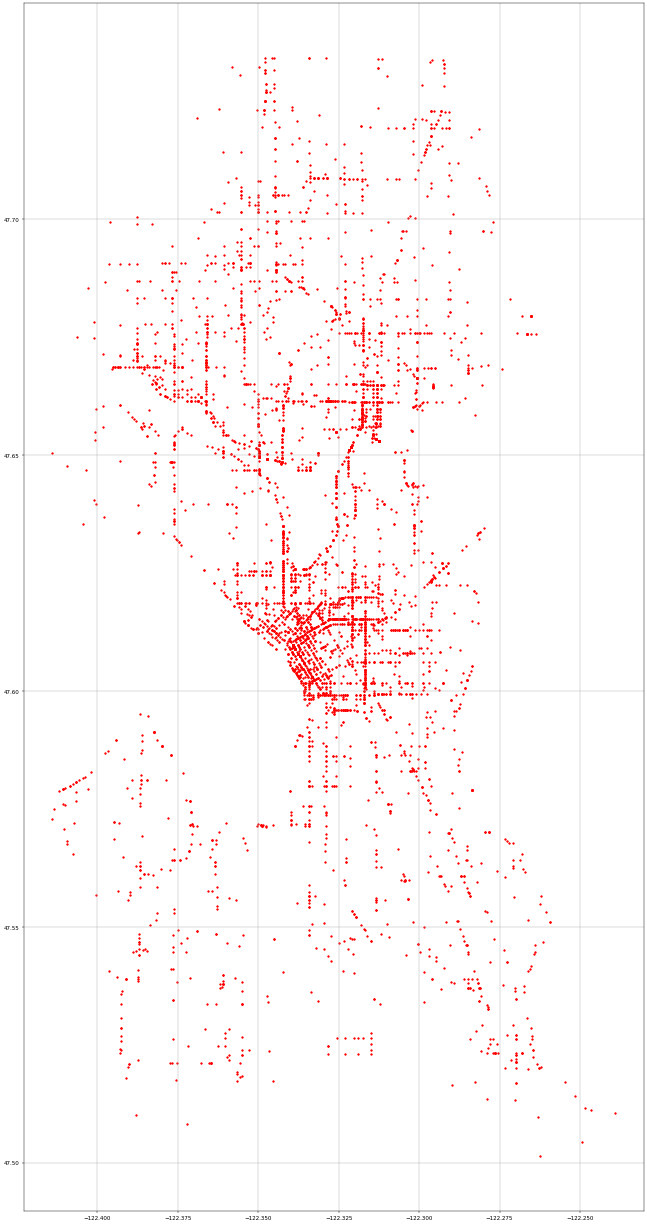

In [49]:
df_SC=df
df_SC = df_SC[df_SC.Ped_cycl_count >= 1]
XV = df_SC[['X']]
YV = df_SC['Y']
fig2 = plt.figure(figsize=(20,40), dpi=40)

#plt.axis([-122.435, -122.225, 47.45, 47.75])
ax = fig.gca()
ax.set_title('Locations of all accidents with bicycles')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_xticks(np.arange(-122.435, -122.225, 0.01))
ax.set_yticks(np.arange(47.45, 47.75, 0.01))
plt.grid()
plt.scatter(XV, YV, marker='.', color='red')
plt.show()

In [50]:
# No alley cases since data lists no GPS coordinates for alley accidents
# First trends:
# more cases in the blocks
# decreasing accidents over the weekend
# Many accidents at midnight --> overfatigue
# increasing accidents in the morning hour --> people on their way to work, still tired and lot of traffic.
# increasing accidents in the afternoon --> people on their way to home, stressed (!) and lot of traffic.
# Most accidents when daylight or dark - streets lights on

# 4. Machine Learning

In [51]:
Feature=df[["Adress_type","Light_cond","Hour","Y","X","Weather","Road_cond","Week_day"]]
Feature.head()
# 'Adress_type','Light_cond','Hour'

,Adress_type,Light_cond,Hour,Y,X,Weather,Road_cond,Week_day
0,3,4,14,47.703140,-122.323148,4,3,2
1,2,2,18,47.647172,-122.347294,5,3,2
2,2,4,10,47.607871,-122.334540,4,1,3
3,2,4,9,47.604803,-122.334803,1,1,4
4,3,4,8,47.545739,-122.306426,5,3,2


## 4.1 Feature selection

In [52]:
X = Feature
X[0:5]

,Adress_type,Light_cond,Hour,Y,X,Weather,Road_cond,Week_day
0,3,4,14,47.703140,-122.323148,4,3,2
1,2,2,18,47.647172,-122.347294,5,3,2
2,2,4,10,47.607871,-122.334540,4,1,3
3,2,4,9,47.604803,-122.334803,1,1,4
4,3,4,8,47.545739,-122.306426,5,3,2


In [53]:
y = df['Severity_code'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

## 4.2 Normalize Data 

In [54]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.3138711 ,  0.58895955,  0.36335767,  1.48574946,  0.24114016,
         0.97283204,  1.41761682, -0.4898705 ],
       [-0.76110967, -1.46628725,  0.94441321,  0.49814705, -0.56876834,
         1.53936045,  1.41761682, -0.4898705 ],
       [-0.76110967,  0.58895955, -0.21769787, -0.19535529, -0.14096006,
         0.97283204, -0.60239007,  0.03140332],
       [-0.76110967,  0.58895955, -0.36296175, -0.24950243, -0.14979174,
        -0.7267532 , -0.60239007,  0.55267714],
       [ 1.3138711 ,  0.58895955, -0.50822564, -1.29172946,  0.80203749,
         1.53936045,  1.41761682, -0.4898705 ]])

## 4.3 Classification 

### 4.3.1 K Nearest Neighbor(KNN)

In [55]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132967, 8) (132967,)
Test set: (33242, 8) (33242,)


In [56]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [57]:
# just for sanity chaeck
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

In [58]:
# Best k
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    kNN_yhat = kNN_model.predict(X_test)
    mean_acc[n-1]=np.mean(yhat==y_test)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.60778533, 0.60778533, 0.60778533, 0.60778533, 0.60778533,
       0.60778533, 0.60778533, 0.60778533, 0.60778533])

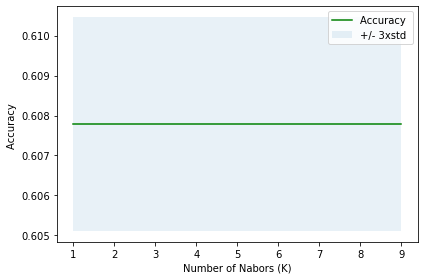

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [60]:
# Building the model again, using k=6
k = 6
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=6)

In [61]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 2], dtype=int64)

### 4.3.2 Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [63]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### 4.3.3 Support Vector Machine (SVM)

In [ ]:
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

In [ ]:
yhat = SVM_model.predict(X_test)
yhat

### 4.3.4 Logistic Regression

In [ ]:
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

In [ ]:
yhat = LR_model.predict(X_test)
yhat

## 4.4 Model Evaluation using Test set

In [ ]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

In [ ]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

In [ ]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

In [ ]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

In [ ]:
# K Mean Clustering
#XY zusammen